In [1]:
import pickle
import tensorflow as tf
from pathlib import Path
import json
import matplotlib.pylab as plt
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# declare model name and model weights name
model_it_name = 'EfficientNetB0_v2_it.h5'
model_it_history_name = 'EfficientNetB0_v2_it_history.pkl'
model_it_weights_name = 'EfficientNetB0_v2_it_weights.h5'
model_it_jsonconfig_name = 'EfficientNetB0_v2_it_config.json'

model_ft_name = 'EfficientNetB0_v2_ft.h5'
model_ft_history_name = 'EfficientNetB0_v2_ft_history.pkl'
model_ft_weights_name = 'EfficientNetB0_v2_ft_weights.h5'
model_ft_jsonconfig_name = 'EfficientNetB0_v2_ft_config.json'

In [ ]:
# save the weights and model config
model_it = tf.keras.models.load_model(model_it_name)
model_it.save_weights(model_it_weights_name)
json_it_config = model_it.to_json()
with open(model_it_jsonconfig_name, 'w') as outfile:
    json.dump(json_it_config, outfile,indent=4)
    
model_ft = tf.keras.models.load_model(model_ft_name)
model_ft.save_weights(model_ft_weights_name)
json_ft_config = model_ft.to_json()

with open(model_ft_jsonconfig_name, 'w') as outfile:
    json.dump(json_ft_config, outfile,indent=4)

In [3]:
# load history files
model_it_history = pickle.load(open(model_it_history_name, 'rb'))
model_ft_history = pickle.load(open(model_ft_history_name, 'rb'))

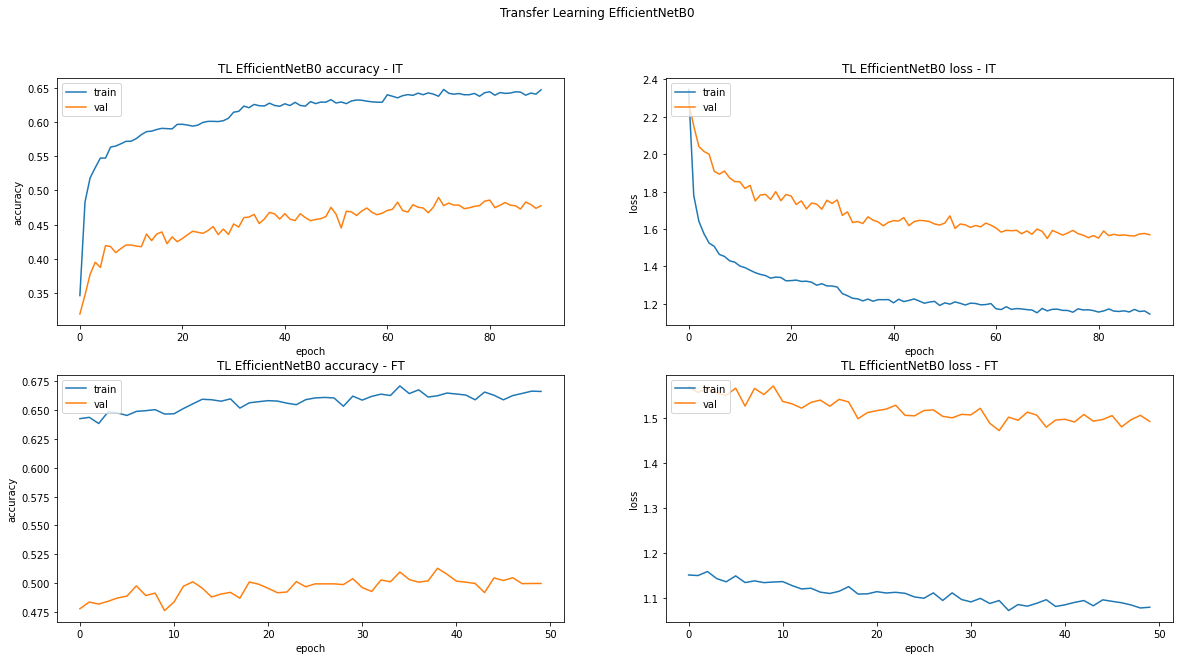

In [4]:
# plots
fig = plt.figure(1)
fig.set_size_inches(20, 10)
fig.suptitle("Transfer Learning EfficientNetB0")

(axs0, axs1) = fig.subplots(2, 2)

# plot for accuracy during initial training 
axs0[0].set_title("TL EfficientNetB0 accuracy - IT")
axs0[0].set(xlabel="epoch", ylabel="accuracy")
axs0[0].plot(model_it_history["accuracy"])
axs0[0].plot(model_it_history["val_accuracy"])
axs0[0].legend(['train', 'val'], loc="upper left")

# plot for loss during initial training 
axs0[1].set_title("TL EfficientNetB0 loss - IT")
axs0[1].set(xlabel="epoch", ylabel="loss")
axs0[1].plot(model_it_history["loss"])
axs0[1].plot(model_it_history["val_loss"])
axs0[1].legend(['train', 'val'], loc="upper left")

# plot for accuracy during fine tuning 
axs1[0].set_title("TL EfficientNetB0 accuracy - FT")
axs1[0].set(xlabel="epoch", ylabel="accuracy")
axs1[0].plot(model_ft_history["accuracy"])
axs1[0].plot(model_ft_history["val_accuracy"])
axs1[0].legend(['train', 'val'], loc="upper left")

# plot for loss during fine tuning
axs1[1].set_title("TL EfficientNetB0 loss - FT")
axs1[1].set(xlabel="epoch", ylabel="loss")
axs1[1].plot(model_ft_history["loss"])
axs1[1].plot(model_ft_history["val_loss"])
axs1[1].legend(['train', 'val'], loc="upper left")

In [5]:
# load model from json config and saved weights
model_ft = tf.keras.models.model_from_json(json.load(open(model_ft_jsonconfig_name, 'rb')))
model_ft.load_weights(model_ft_weights_name)

In [6]:
# compile the model
model_ft.compile(loss='categorical_crossentropy',
              metrics=['accuracy'])

model_ft.summary()

Model: "EfficientNetB0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 avg_pool (GlobalAveragePool  (None, 1280)             0         
 ing2D)                                                          
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 top_dropout (Dropout)       (None, 1280)              0         
                                                                 
 flatten (Flatten)           (None, 1280)           

In [7]:
# define image size and classes
img_h = 224
img_w = 224

class_names = ['2_clubs', '2_diamonds', '2_hearts', '2_spades',
               '3_clubs', '3_diamonds', '3_hearts', '3_spades',
               '4_clubs', '4_diamonds', '4_hearts', '4_spades',
               '5_clubs', '5_diamonds', '5_hearts', '5_spades',
               '6_clubs', '6_diamonds', '6_hearts', '6_spades',
               '7_clubs', '7_diamonds', '7_hearts', '7_spades',
               '8_clubs', '8_diamonds', '8_hearts', '8_spades',
               '9_clubs', '9_diamonds', '9_hearts', '9_spades',
               '10_clubs', '10_diamonds', '10_hearts', '10_spades',
               'ace_clubs', 'ace_diamonds', 'ace_hearts', 'ace_spades',
               'jack_clubs', 'jack_diamonds', 'jack_hearts', 'jack_spades',
               'king_clubs', 'king_diamonds', 'king_hearts', 'king_spades',
               'queen_clubs', 'queen_diamonds', 'queen_hearts', 'queen_spades']

num_classes = len(class_names)

In [8]:
# define testing data
batch_size = 16
dataset_path = Path('../dataset_test')

generator = ImageDataGenerator()

test_gen = generator.flow_from_directory(directory=dataset_path,
                                               target_size=(img_h, img_w),
                                               batch_size=batch_size,
                                               classes=class_names,
                                               class_mode='categorical',
                                               interpolation='nearest',
                                               seed=42)

Found 7794 images belonging to 52 classes.


In [9]:
# evaluate the model
model_ft.evaluate(test_gen)

488/488 [==============================] - 590s 1s/step - loss: 1.4793 - accuracy: 0.5593


[1.4792689085006714, 0.5592763423919678]